In [1]:
import hssm
import pandas as pd
import pickle
import numpy as np

In [2]:
def load_data(filename_base: str,
              folder: str = "data") -> tuple[pd.DataFrame, pd.DataFrame, dict]:
    """Load saved simulation data and parameters from files.

    Parameters
    ----------
    filename_base : str
        Base filename used when saving files
    folder : str, optional
        Folder containing saved files, by default "data"

    Returns
    -------
    tuple[pd.DataFrame, pd.DataFrame, dict]
        Contains:
        - DataFrame with modeling data
        - DataFrame with full data  
        - Dict containing group and subject parameters
    """
    with open(f"{folder}/{filename_base}_parameters.pkl", "rb") as f:
        parameters = pickle.load(f)
    
    df_modeling = pd.read_parquet(f"{folder}/{filename_base}_modeling.parquet")
    df_ordered = pd.read_parquet(f"{folder}/{filename_base}_full.parquet")
    return df_ordered, df_modeling, parameters




# def sample_or_attach():

## Basic DDM Model

In [5]:
basic_ddm_ordered, basic_ddm_modeling, basic_ddm_parameters = load_data(filename_base = "basic_ddm",
          folder = "data/basic_ddm_data")

In [7]:
basic_ddm_modeling

,response,rt,participant_id,trial
0,-1,1.472690,0,1
1,-1,2.032357,0,2
2,-1,1.282486,0,3
3,-1,0.936535,0,4
4,-1,2.576143,0,5
...,...,...,...,...
1995,-1,1.266260,9,196
1996,1,1.431693,9,197
1997,1,1.388929,9,198
1998,1,1.187641,9,199


In [9]:
BasicDDMModel = hssm.HSSM(data = basic_ddm_modeling,
                          model = "ddm",
                          loglik_kind = "approx_differentiable",
                          global_formula = "y ~ 1 + (1|participant_id)",
                          noncentered = False,
                          )

Model initialized successfully.


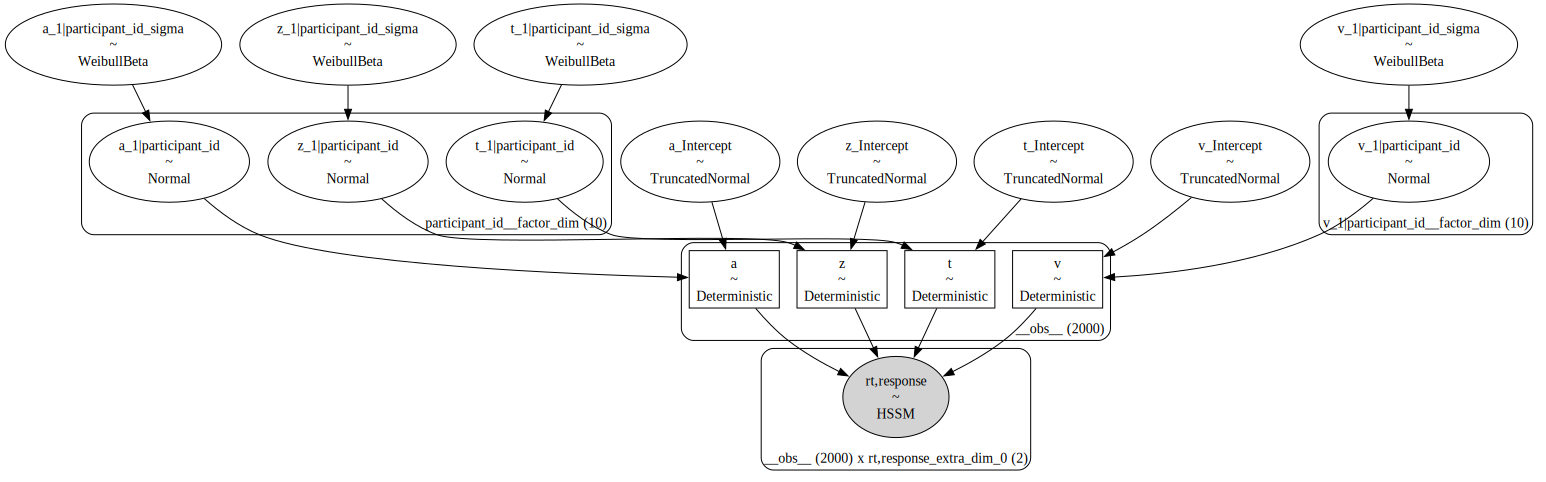

In [10]:
BasicDDMModel.graph()

In [11]:
basicddm_mcmc_idata =BasicDDMModel.sample(chains = 2,
                     sampler = "nuts_numpyro",
                     tune = 500,
                     draws = 500,
                     )

Using default initvals. 



  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/Users/afengler/Library/CloudStorage/OneDrive-Personal/proj_hssm/HSSM/.venv/lib/python3.12/site-packages/pymc/pytensorf.py:958: FutureWarning: compile_pymc was renamed to compile. Old name will be removed in a future release of PyMC
  warnings.warn(
100%|██████████| 1000/1000 [00:01<00:00, 526.87it/s]


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [12]:
BasicDDMModel.traces

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [16]:
basic_ddm_vi_idata = BasicDDMModel.vi(method = "advi",
                                      draws = 1000,
                                      niter = 25000,
                                      return_idata = True
                                      )

Using MCMC starting point defaults.


Output()

Finished [100%]: Average Loss = 72,445


In [17]:
basic_ddm_vi_idata

Inference data with groups:
	> posterior
	> observed_data

In [18]:
basic_ddm_parameters

{'group_params': {'beta_a_intercept_mean': 1.25,
  'beta_a_intercept_std': 0.15,
  'beta_z_intercept_mean': 0.4858154882123811,
  'beta_z_intercept_std': 0.07008682205096232,
  'beta_t_intercept_mean': 0.3,
  'beta_t_intercept_std': 0.075},
 'subject_params': {'beta_a_intercept_subject': array([1.07188825, 1.35182838, 1.18615676, 1.39747074, 1.32269294,
         0.98634004, 1.18702859, 1.68161985, 1.61996968, 1.09207527]),
  'beta_z_intercept_subject': array([0.63534977, 0.49950177, 0.50896362, 0.51849203, 0.35996693,
         0.54629309, 0.4640406 , 0.51633473, 0.43816344, 0.42282964]),
  'beta_t_intercept_subject': array([0.3280846 , 0.27839654, 0.29551002, 0.21477522, 0.31971981,
         0.29061765, 0.34491792, 0.25804065, 0.26120513, 0.38334715])}}

### Basic Angle Model

In [19]:
basic_angle_ordered, basic_angle_modeling, basic_angle_parameters = load_data(filename_base = "basic_angle",
          folder = "data/basic_angle_data")

In [20]:
basic_angle_modeling

,response,rt,participant_id,trial
0,-1,1.178340,0,1
1,-1,0.933489,0,2
2,-1,1.019747,0,3
3,-1,1.399996,0,4
4,1,1.256540,0,5
...,...,...,...,...
1995,-1,0.460907,9,196
1996,-1,0.534679,9,197
1997,-1,0.853511,9,198
1998,-1,0.562657,9,199


In [21]:
BasicAngleModel = hssm.HSSM(data = basic_angle_modeling,
                          model = "angle",
                          loglik_kind = "approx_differentiable",
                          global_formula = "y ~ 1 + (1|participant_id)",
                          noncentered = False,
                          )

Model initialized successfully.


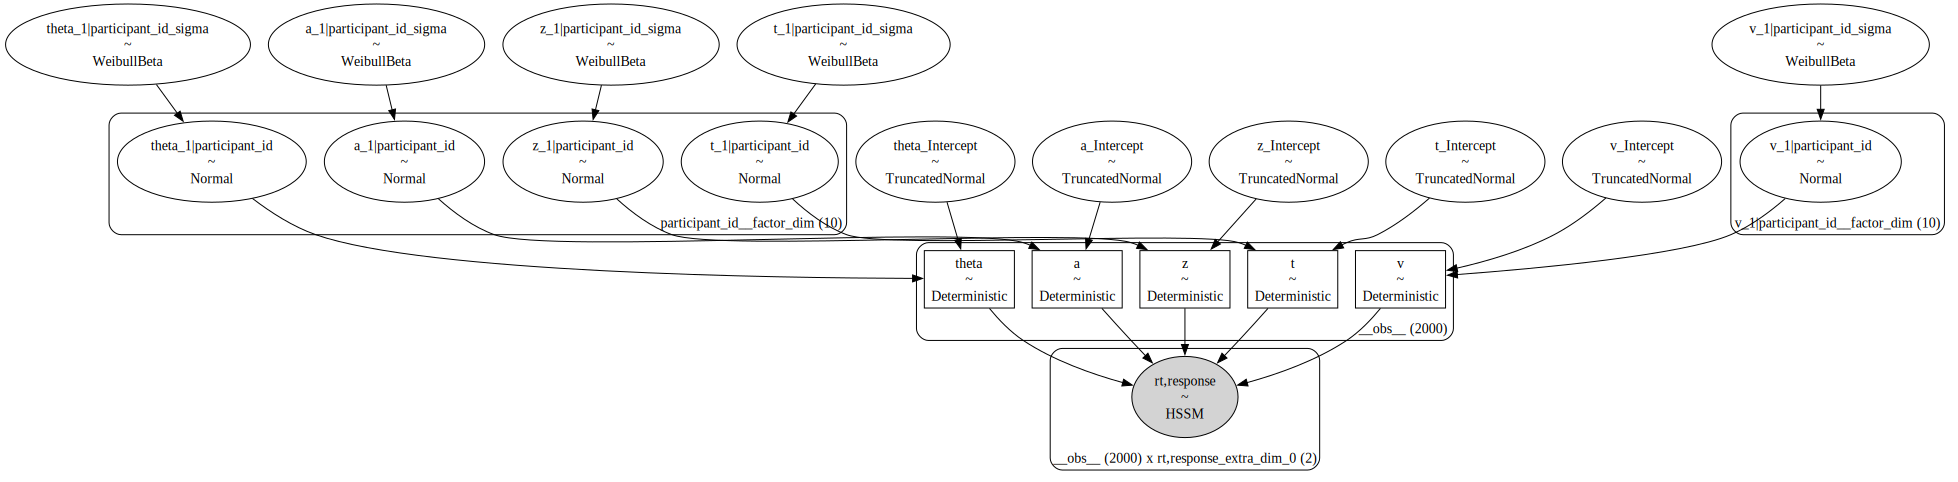

In [22]:
BasicAngleModel.graph()

In [23]:
basicangle_mcmc_idata = BasicAngleModel.sample(chains = 2,
                                               sampler = "nuts_numpyro",
                                               tune = 500,
                                               draws = 500,
                                               )


Using default initvals. 



  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
/Users/afengler/Library/CloudStorage/OneDrive-Personal/proj_hssm/HSSM/.venv/lib/python3.12/site-packages/pymc/pytensorf.py:958: FutureWarning: compile_pymc was renamed to compile. Old name will be removed in a future release of PyMC
  warnings.warn(
100%|██████████| 1000/1000 [00:01<00:00, 505.47it/s]


In [25]:
BasicAngleModel.traces

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [ ]:
basic_angle_vi_idata = BasicAngleModel.vi(method = "advi",
                                          draws = 1000,
                                          niter = 25000,
                                          return_idata = True
                                          )

In [26]:
basic_angle_vi_idata

NameError: name 'basic_angle_vi_idata' is not defined

In [27]:
basic_angle_parameters

{'group_params': {'beta_a_intercept_mean': 1.4381808964663083,
  'beta_a_intercept_std': 0.10673509372193583,
  'beta_z_intercept_mean': 0.36305242897097345,
  'beta_z_intercept_std': 0.06085314860029902,
  'beta_t_intercept_mean': 0.3,
  'beta_t_intercept_std': 0.075,
  'beta_theta_intercept_mean': 0.4,
  'beta_theta_intercept_std': 0.075},
 'subject_params': {'beta_a_intercept_subject': array([1.32076133, 1.56204509, 1.28897836, 1.55928757, 1.34993333,
         1.38223387, 1.57077624, 1.27583509, 1.3140858 , 1.31507563]),
  'beta_z_intercept_subject': array([0.33548823, 0.37814504, 0.29588575, 0.40632034, 0.25592316,
         0.43894691, 0.42306789, 0.40712779, 0.37497825, 0.3544666 ]),
  'beta_t_intercept_subject': array([0.2489964 , 0.27093806, 0.40939925, 0.22704435, 0.26149037,
         0.25739215, 0.40537832, 0.32031056, 0.21413595, 0.27023037]),
  'beta_theta_intercept_subject': array([0.42817872, 0.30104176, 0.47863779, 0.6113743 , 0.33749575,
         0.41081797, 0.37715165, 

### Angle Regression

In [50]:
angle_regression_ordered, \
    angle_regression_modeling, \
        angle_regression_parameters = load_data(filename_base = "angle_regression",
                                                folder = "data/angle_regression_data")

In [51]:
angle_regression_modeling

,response,rt,participant_id,trial,costly_fail_condition,continuous_difficulty
0,1,1.238434,0,1,0,0.382430
1,1,0.974486,0,2,1,-0.461047
2,1,0.924057,0,3,0,-0.132188
3,1,0.711031,0,4,0,0.474331
4,1,1.215987,0,5,1,0.922393
...,...,...,...,...,...,...
4995,1,0.849275,19,246,0,0.523546
4996,1,0.658151,19,247,1,0.824909
4997,1,0.807452,19,248,0,0.977539
4998,1,0.874717,19,249,1,0.916776


In [52]:
angle_regression_ordered[['response',
                          'rt',
                          'participant_id',
                          'trial',
                          'v',
                          'a',
                          'z',
                          't',
                          'theta',
                          'costly_fail_condition',
                          'continuous_difficulty']]

,response,rt,participant_id,trial,v,a,z,t,theta,costly_fail_condition,continuous_difficulty
0,1,1.238434,0,1,0.906354,0.994558,0.453364,0.350427,0.489748,0,0.382430
1,1,0.974486,0,2,1.094893,1.096361,0.453364,0.350427,0.489748,1,-0.461047
2,1,0.924057,0,3,1.021385,0.994558,0.453364,0.350427,0.489748,0,-0.132188
3,1,0.711031,0,4,0.885811,0.994558,0.453364,0.350427,0.489748,0,0.474331
4,1,1.215987,0,5,0.785658,1.096361,0.453364,0.350427,0.489748,1,0.922393
...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0.849275,19,246,1.363097,1.536360,0.602198,0.259587,0.383610,0,0.523546
4996,1,0.658151,19,247,1.477892,1.740118,0.602198,0.259587,0.383610,1,0.824909
4997,1,0.807452,19,248,1.536032,1.536360,0.602198,0.259587,0.383610,0,0.977539
4998,1,0.874717,19,249,1.512886,1.740118,0.602198,0.259587,0.383610,1,0.916776


In [53]:
AngleRegressionModel = hssm.HSSM(data = angle_regression_modeling,
                                 model = "angle",
                                 loglik_kind = "approx_differentiable",
                                 global_formula = "y ~ 1 + (1|participant_id)",
                                 include = [{"name": "v",
                                            "formula": "v ~ 1 + continuous_difficulty + (1 + continuous_difficulty|participant_id)"},
                                            {"name": "a",
                                                "formula": "a ~ 1 + C(costly_fail_condition) + (1 + C(costly_fail_condition)|participant_id)"},
                                            ],
                                 noncentered = False,
                                 )

Model initialized successfully.


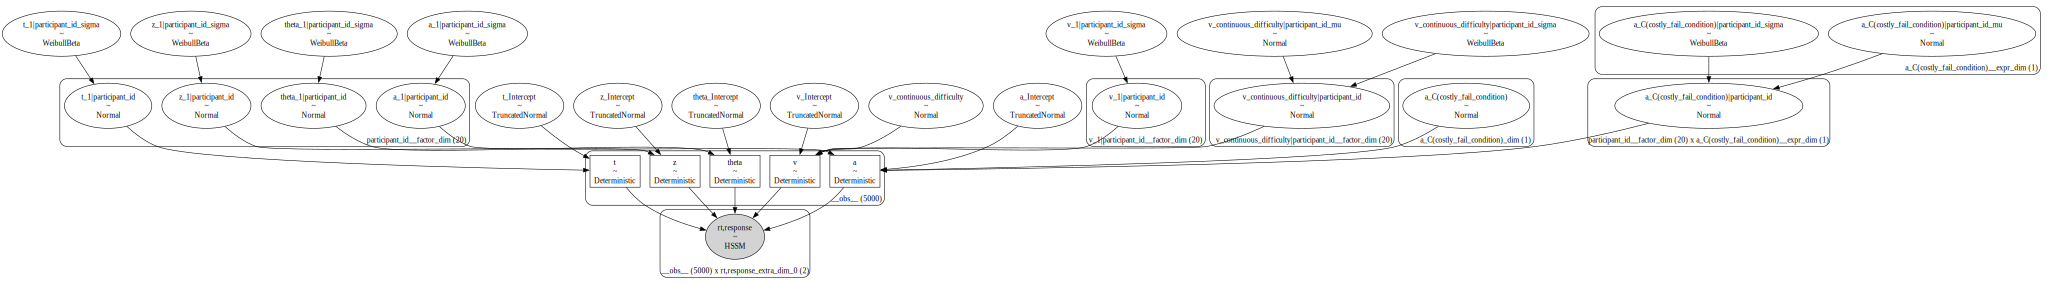

In [54]:
AngleRegressionModel.graph()

In [55]:
# Initial Values
AngleRegressionModel.initvals

{'v_Intercept': array(0.),
 'v_continuous_difficulty': array(0.),
 'v_1|participant_id_sigma': array(0.27082359),
 'v_1|participant_id': array([ 2.76673702e-03, -6.98295422e-03, -8.58738180e-03,  1.97839283e-04,
        -8.95176362e-03, -6.74634660e-03, -1.34488582e-04, -9.96348215e-04,
        -3.90060304e-04, -7.07767112e-03,  8.95338133e-03,  4.71820356e-03,
         5.39033301e-03,  4.41633537e-03,  6.12076186e-03, -9.32239927e-05,
        -1.04051316e-03,  2.63471133e-03, -7.72880763e-03, -1.09082903e-03]),
 'v_continuous_difficulty|participant_id_mu': array(0.),
 'v_continuous_difficulty|participant_id_sigma': array(0.27082359),
 'v_continuous_difficulty|participant_id': array([-0.00209778, -0.00235047, -0.00704639, -0.000661  , -0.00020492,
         0.00950686,  0.00846925,  0.00668273,  0.00718136, -0.005484  ,
         0.00617954, -0.00452754, -0.00082853,  0.00731797, -0.00515221,
        -0.00231433, -0.00843354, -0.00536729,  0.00723138, -0.00736526]),
 'a_Intercept': array

In [56]:
angle_regression_ordered

,response,rt,participant_id,trial,v,a,z,t,theta,beta_a_intercept_mean,...,beta_z_intercept_std,beta_z_intercept_subject,costly_fail_condition,beta_a_costly_fail_condition_group_mean,beta_a_costly_fail_condition_group_std,beta_a_costly_fail_condition_subject,continuous_difficulty,beta_v_difficulty_group_mean,beta_v_difficulty_group_std,beta_v_difficulty_subject
0,1,1.238434,0,1,0.906354,0.994558,0.453364,0.350427,0.489748,1.095381,...,0.053433,0.453364,0,0.114882,0.071224,0.101803,0.382430,-0.12526,0.183317,-0.223527
1,1,0.974486,0,2,1.094893,1.096361,0.453364,0.350427,0.489748,1.095381,...,0.053433,0.453364,1,0.114882,0.071224,0.101803,-0.461047,-0.12526,0.183317,-0.223527
2,1,0.924057,0,3,1.021385,0.994558,0.453364,0.350427,0.489748,1.095381,...,0.053433,0.453364,0,0.114882,0.071224,0.101803,-0.132188,-0.12526,0.183317,-0.223527
3,1,0.711031,0,4,0.885811,0.994558,0.453364,0.350427,0.489748,1.095381,...,0.053433,0.453364,0,0.114882,0.071224,0.101803,0.474331,-0.12526,0.183317,-0.223527
4,1,1.215987,0,5,0.785658,1.096361,0.453364,0.350427,0.489748,1.095381,...,0.053433,0.453364,1,0.114882,0.071224,0.101803,0.922393,-0.12526,0.183317,-0.223527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0.849275,19,246,1.363097,1.536360,0.602198,0.259587,0.383610,1.095381,...,0.053433,0.602198,0,0.114882,0.071224,0.203758,0.523546,-0.12526,0.183317,0.380920
4996,1,0.658151,19,247,1.477892,1.740118,0.602198,0.259587,0.383610,1.095381,...,0.053433,0.602198,1,0.114882,0.071224,0.203758,0.824909,-0.12526,0.183317,0.380920
4997,1,0.807452,19,248,1.536032,1.536360,0.602198,0.259587,0.383610,1.095381,...,0.053433,0.602198,0,0.114882,0.071224,0.203758,0.977539,-0.12526,0.183317,0.380920
4998,1,0.874717,19,249,1.512886,1.740118,0.602198,0.259587,0.383610,1.095381,...,0.053433,0.602198,1,0.114882,0.071224,0.203758,0.916776,-0.12526,0.183317,0.380920


In [57]:
angle_regression_mcmc_idata = AngleRegressionModel.sample(chains = 2,
                                                          sampler = "nuts_numpyro",
                                                          tune = 500,
                                                          draws = 500,
                                                          )

Using default initvals. 



  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/Users/afengler/Library/CloudStorage/OneDrive-Personal/proj_hssm/HSSM/.venv/lib/python3.12/site-packages/pymc/pytensorf.py:958: FutureWarning: compile_pymc was renamed to compile. Old name will be removed in a future release of PyMC
  warnings.warn(
100%|██████████| 1000/1000 [00:04<00:00, 225.15it/s]


In [70]:
angle_regression_parameters['group_params']

{'beta_v_intercept_mean': 1.038697633742705,
 'beta_v_intercept_std': 0.3971091196994334,
 'beta_a_intercept_mean': 1.095380586173911,
 'beta_a_intercept_std': 0.19202213351832867,
 'beta_z_intercept_mean': 0.5615178864297536,
 'beta_z_intercept_std': 0.05343332610999294,
 'beta_t_intercept_mean': 0.3,
 'beta_t_intercept_std': 0.075,
 'beta_theta_intercept_mean': 0.4,
 'beta_theta_intercept_std': 0.075,
 'beta_a_costly_fail_condition_group_mean': 0.11488186704110076,
 'beta_a_costly_fail_condition_group_std': 0.07122448603481027,
 'beta_v_difficulty_group_mean': -0.1252600416453469,
 'beta_v_difficulty_group_std': 0.18331652455719505}

In [71]:
az.summary(angle_regression_mcmc_idata, var_names = [ "sigma"], filter_vars = "like")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
z_1|participant_id_sigma,0.071,0.015,0.045,0.099,0.001,0.000,845.0,648.0,1.00
v_1|participant_id_sigma,0.411,0.078,0.274,0.551,0.004,0.004,489.0,525.0,1.01
a_1|participant_id_sigma,0.246,0.048,0.162,0.336,0.002,0.002,789.0,718.0,1.00
v_continuous_difficulty|participant_id_sigma,0.216,0.053,0.131,0.327,0.002,0.002,792.0,642.0,1.00
t_1|participant_id_sigma,0.090,0.018,0.059,0.121,0.001,0.001,1281.0,743.0,1.00
theta_1|participant_id_sigma,0.082,0.026,0.032,0.127,0.001,0.001,329.0,333.0,1.00
a_C(costly_fail_condition)|participant_id_sigma[1],0.056,0.017,0.024,0.088,0.001,0.001,563.0,579.0,1.01


In [ ]:
 basic_angle_vi_idata = BasicAngleModel.vi(method = "advi",
                                          draws = 1000,
                                          niter = 25000,
                                          return_idata = True
                                          )

### Angle Regression Continuous only

In [44]:
angle_regression_cont_ordered, \
    angle_regression_cont_modeling, \
        angle_regression_cont_parameters = load_data(filename_base = "angle_regression_cont",
                                                folder = "data/angle_regression_cont_data")

In [45]:
AngleRegressionContModel = hssm.HSSM(data = angle_regression_cont_modeling,
                                 model = "angle",
                                 loglik_kind = "approx_differentiable",
                                 global_formula = "y ~ 1 + (1|participant_id)",
                                 include = [{"name": "v",
                                            "formula": "v ~ 1 + continuous_difficulty + (1 + continuous_difficulty|participant_id)"}],
                                #         {"name": "a",
                                #             "formula": "a ~ 1 + C(costly_fail_condition) + (1 + C(costly_fail_condition)|participant_id)"},
                                #         ],
                                 noncentered = False,
                                 )

Model initialized successfully.


In [46]:
angle_regression_cont_mcmc_idata = AngleRegressionContModel.sample(chains = 2,
                                                                  sampler = "nuts_numpyro",
                                                                  tune = 500,
                                                                  draws = 500,
                                                                  )

Using default initvals. 



  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/Users/afengler/Library/CloudStorage/OneDrive-Personal/proj_hssm/HSSM/.venv/lib/python3.12/site-packages/pymc/pytensorf.py:958: FutureWarning: compile_pymc was renamed to compile. Old name will be removed in a future release of PyMC
  warnings.warn(
100%|██████████| 1000/1000 [00:04<00:00, 223.88it/s]


### Angle Sticky Regression

In [72]:
angle_sticky_regression_ordered, \
    angle_sticky_regression_modeling, \
        angle_sticky_regression_parameters = load_data(filename_base = "angle_sticky_choice",
                                                       folder = "data/angle_sticky_choice_data")

In [73]:
angle_sticky_regression_ordered

,response,rt,participant_id,trial,v,a,z,t,theta,beta_a_intercept_mean,...,beta_a_costly_fail_condition_group_std,beta_a_costly_fail_condition_subject,continuous_difficulty,beta_v_difficulty_group_mean,beta_v_difficulty_group_std,beta_v_difficulty_subject,beta_sticky_z_group_mean,beta_sticky_z_group_std,beta_sticky_z_subject,response_l1
0,1,0.556439,0,1,1.239158,1.437554,0.532412,0.248397,0.302845,1.25,...,0.084042,0.262021,-0.277337,-0.276497,0.056894,-0.241478,0.073953,0.05,0.028132,0
1,1,0.741682,0,2,1.368006,1.175533,0.560544,0.248397,0.302845,1.25,...,0.084042,0.262021,-0.810919,-0.276497,0.056894,-0.241478,0.073953,0.05,0.028132,1
2,1,0.461832,0,3,1.334781,1.175533,0.560544,0.248397,0.302845,1.25,...,0.084042,0.262021,-0.673330,-0.276497,0.056894,-0.241478,0.073953,0.05,0.028132,1
3,1,0.626154,0,4,0.989764,1.175533,0.560544,0.248397,0.302845,1.25,...,0.084042,0.262021,0.755445,-0.276497,0.056894,-0.241478,0.073953,0.05,0.028132,1
4,1,0.651677,0,5,1.139164,1.437554,0.560544,0.248397,0.302845,1.25,...,0.084042,0.262021,0.136755,-0.276497,0.056894,-0.241478,0.073953,0.05,0.028132,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,1.039342,19,246,0.894122,1.149217,0.341549,0.311538,0.423650,1.25,...,0.084042,0.168772,-0.612223,-0.276497,0.056894,-0.175705,0.073953,0.05,0.124461,-1
4996,1,1.587827,19,247,0.657866,1.149217,0.590471,0.311538,0.423650,1.25,...,0.084042,0.168772,0.732396,-0.276497,0.056894,-0.175705,0.073953,0.05,0.124461,1
4997,1,0.668594,19,248,0.817356,1.317990,0.590471,0.311538,0.423650,1.25,...,0.084042,0.168772,-0.175321,-0.276497,0.056894,-0.175705,0.073953,0.05,0.124461,1
4998,1,1.616471,19,249,0.897324,1.149217,0.590471,0.311538,0.423650,1.25,...,0.084042,0.168772,-0.630447,-0.276497,0.056894,-0.175705,0.073953,0.05,0.124461,1


In [75]:
angle_sticky_regression_modeling

,response,rt,participant_id,trial,costly_fail_condition,continuous_difficulty,response_l1
0,1,0.556439,0,1,1,-0.277337,0
1,1,0.741682,0,2,0,-0.810919,1
2,1,0.461832,0,3,0,-0.673330,1
3,1,0.626154,0,4,0,0.755445,1
4,1,0.651677,0,5,1,0.136755,1
...,...,...,...,...,...,...,...
4995,1,1.039342,19,246,0,-0.612223,-1
4996,1,1.587827,19,247,0,0.732396,1
4997,1,0.668594,19,248,1,-0.175321,1
4998,1,1.616471,19,249,0,-0.630447,1


In [17]:
StickyRegressionModel = hssm.HSSM(data = angle_sticky_regression_modeling,
                                  model = "angle",
                                  global_formula = "y ~ (1|participant_id)",
                                  include = [{'name': "z",
                                             'formula': "z ~ (1 + response_l1|participant_id)"
                                             }],
                                 noncentered = False,
                                )

Model initialized successfully.


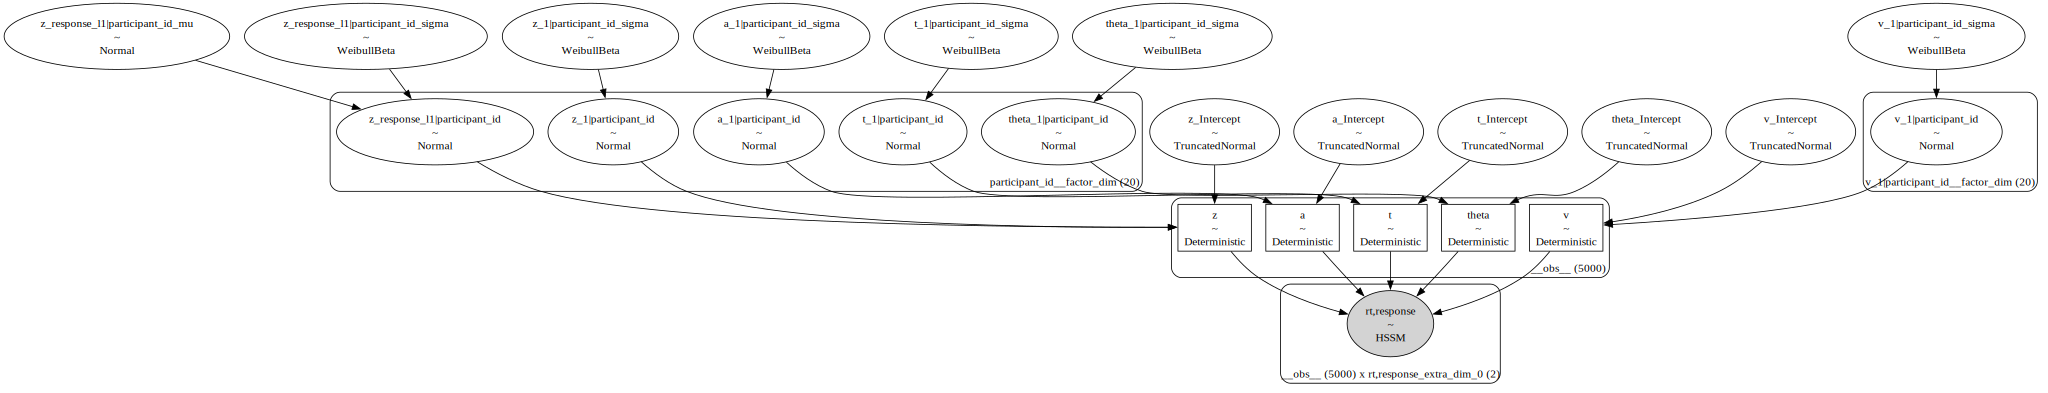

In [18]:
StickyRegressionModel.graph()

In [19]:
angle_sticky_regression_mcmc_idata = StickyRegressionModel.sample(chains = 2,
                                                                  sampler = "nuts_numpyro",
                                                                  tune = 500,
                                                                  draws = 500,
                                                                  )

Using default initvals. 



  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
/Users/afengler/Library/CloudStorage/OneDrive-Personal/proj_hssm/HSSM/.venv/lib/python3.12/site-packages/pymc/pytensorf.py:958: FutureWarning: compile_pymc was renamed to compile. Old name will be removed in a future release of PyMC
  warnings.warn(
100%|██████████| 1000/1000 [00:05<00:00, 184.25it/s]


array([[<Axes: title={'center': 'z_response_l1|participant_id_sigma'}>,
        <Axes: title={'center': 'z_response_l1|participant_id_sigma'}>]],
      dtype=object)

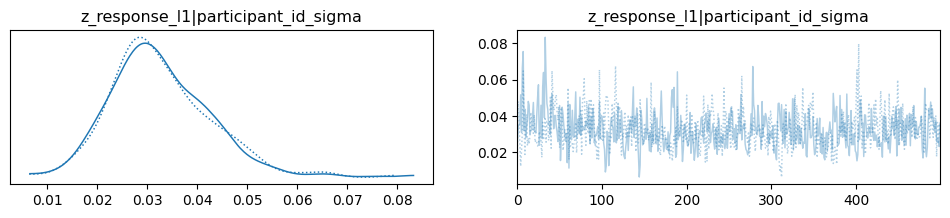

In [32]:
import arviz as az
az.plot_trace(angle_sticky_regression_mcmc_idata.posterior, var_names = ["z_response_l1|participant_id_sigma"])

In [31]:
help(az.plot_trace)

Help on function plot_trace in module arviz.plots.traceplot:

plot_trace(data: arviz.data.inference_data.InferenceData, var_names: Optional[Sequence[str]] = None, filter_vars: Optional[str] = None, transform: Optional[Callable] = None, coords: Optional[Dict[str, List[Any]]] = None, divergences: Optional[str] = 'auto', kind: Optional[str] = 'trace', figsize: Optional[Tuple[float, float]] = None, rug: bool = False, lines: Optional[List[Tuple[str, Dict[str, List[Any]], Any]]] = None, circ_var_names: Optional[List[str]] = None, circ_var_units: str = 'radians', compact: bool = True, compact_prop: Union[str, Mapping[str, Any], NoneType] = None, combined: bool = False, chain_prop: Union[str, Mapping[str, Any], NoneType] = None, legend: bool = False, plot_kwargs: Optional[Dict[str, Any]] = None, fill_kwargs: Optional[Dict[str, Any]] = None, rug_kwargs: Optional[Dict[str, Any]] = None, hist_kwargs: Optional[Dict[str, Any]] = None, trace_kwargs: Optional[Dict[str, Any]] = None, rank_kwargs: Opti

In [26]:
angle_sticky_regression_parameters 

{'group_params': {'beta_v_intercept_mean': 1.0503080616395999,
  'beta_v_intercept_std': 0.6314963488517682,
  'beta_a_intercept_mean': 1.25,
  'beta_a_intercept_std': 0.15,
  'beta_z_intercept_mean': 0.45808352658502577,
  'beta_z_intercept_std': 0.06743950289169837,
  'beta_t_intercept_mean': 0.3,
  'beta_t_intercept_std': 0.075,
  'beta_theta_intercept_mean': 0.4,
  'beta_theta_intercept_std': 0.075,
  'beta_a_costly_fail_condition_group_mean': 0.33091391883362625,
  'beta_a_costly_fail_condition_group_std': 0.08404216203389844,
  'beta_v_difficulty_group_mean': -0.27649682763808614,
  'beta_v_difficulty_group_std': 0.05689384132793407,
  'beta_sticky_z_group_mean': 0.07395343885052616,
  'beta_sticky_z_group_std': 0.05},
 'subject_params': {'beta_v_intercept_subject': array([1.17218717, 1.07306238, 0.63793436, 1.3952178 , 1.05243997,
         1.02796126, 0.83373105, 1.40201803, 0.80582133, 0.91383946,
         0.74292201, 1.83915247, 1.26387484, 0.68100753, 0.40631692,
         1.1

In [ ]:
import arviz as az

In [ ]:
StickyRegressionModel = hssm.HSSM(data = angle_sticky_regression_modeling,
                                  model = "angle",
                                  global_formula = "y ~ (1|participant_id)",
                                  include = [{'name': "z",
                                             'formula': "z ~ (1 + response_l1|participant_id)",
                                             }],
                                 noncentered = False,
                                )

In [36]:
StickyRegressionModel_v2 = hssm.HSSM(data = angle_sticky_regression_modeling,
                                  model = "angle",
                                  global_formula = "y ~ (1|participant_id)",
                                  include = [{'name': "z",
                                             'formula': "z ~ (1 + response_l1|participant_id)",
                                             },
                                             {"name": "a",
                                              "formula": "a ~ (1 + costly_fail_condition|participant_id)"}],
                                 noncentered = False,
                                 p_outlier = 0.0,
                                )

You have specified the `lapse` argument to include a lapse distribution, but `p_outlier` is set to either 0 or None. Your lapse distribution will be ignored.
Model initialized successfully.


In [37]:
StickyRegressionModel_v2

Hierarchical Sequential Sampling Model
Model: angle

Response variable: rt,response
Likelihood: approx_differentiable
Observations: 5000

Parameters:

v:
    Formula: v ~ (1|participant_id)
    Priors:
        v_Intercept ~ Normal(mu: 0.0, sigma: 0.25)
        v_1|participant_id ~ Normal(mu: 0.0, sigma: Weibull(alpha: 1.5, beta: 0.3))
    Link: identity
    Explicit bounds: (-3.0, 3.0)

a:
    Formula: a ~ (1 + costly_fail_condition|participant_id)
    Priors:
        a_Intercept ~ Normal(mu: 1.65, sigma: 0.25)
        a_1|participant_id ~ Normal(mu: 0.0, sigma: Weibull(alpha: 1.5, beta: 0.3))
        a_costly_fail_condition|participant_id ~ Normal(mu: Normal(mu: 0.0, sigma: 0.25), sigma: Weibull(alpha: 1.5, beta: 0.3))
    Link: identity
    Explicit bounds: (0.3, 3.0)

z:
    Formula: z ~ (1 + response_l1|participant_id)
    Priors:
        z_Intercept ~ Normal(mu: 0.5, sigma: 0.25)
        z_1|participant_id ~ Normal(mu: 0.0, sigma: Weibull(alpha: 1.5, beta: 0.3))
        z_response

In [ ]:
angle_sticky_regression_v2_mcmc_idata = StickyRegressionModel_v2.sample(chains = 2,
                                                                        sampler = "nuts_numpyro",
                                                                        tune = 500,
                                                                        draws = 500,
                                                                        )

In [76]:
StickyRegressionModel_v3 = hssm.HSSM(data = angle_sticky_regression_modeling,
                                     model = "angle",
                                     global_formula = "y ~ (1|participant_id)",
                                     include = [{'name': "z",
                                                'formula': "z ~ (1 + response_l1|participant_id)",
                                                },
                                                {"name": "a",
                                                "formula": "a ~ (1 + costly_fail_condition|participant_id)"
                                                },
                                                {"name": "v",
                                                "formula": "v ~ 1 + continuous_difficulty + (1 + continuous_difficulty|participant_id)"
                                                }],
                                     noncentered = False,
                                     p_outlier = 0.05,
                                     )

Model initialized successfully.


In [77]:
angle_sticky_regression_v3_mcmc_idata = StickyRegressionModel_v3.sample(chains = 2,
                                                                        sampler = "nuts_numpyro",
                                                                        tune = 500,
                                                                        draws = 500,
                                                                        )

Using default initvals. 



  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

There were 257 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/Users/afengler/Library/CloudStorage/OneDrive-Personal/proj_hssm/HSSM/.venv/lib/python3.12/site-packages/pymc/pytensorf.py:958: FutureWarning: compile_pymc was renamed to compile. Old name will be removed in a future release of PyMC
  warnings.warn(
100%|██████████| 1000/1000 [00:04<00:00, 212.45it/s]


In [80]:
help(az.summary)

Help on function summary in module arviz.stats.stats:

summary(data, var_names: Optional[List[str]] = None, filter_vars=None, group=None, fmt: "Literal['wide', 'long', 'xarray']" = 'wide', kind: "Literal['all', 'stats', 'diagnostics']" = 'all', round_to=None, circ_var_names=None, stat_focus='mean', stat_funcs=None, extend=True, hdi_prob=None, skipna=False, labeller=None, coords=None, index_origin=None, order=None) -> Union[pandas.core.frame.DataFrame, xarray.core.dataset.Dataset]
    Create a data frame with summary statistics.

    Parameters
    ----------
    data: obj
        Any object that can be converted to an :class:`arviz.InferenceData` object
        Refer to documentation of :func:`arviz.convert_to_dataset` for details
    var_names: list
        Names of variables to include in summary. Prefix the variables by ``~`` when you
        want to exclude them from the summary: `["~beta"]` instead of `["beta"]` (see
        examples below).
    filter_vars: {None, "like", "regex"

In [85]:
az.summary(angle_sticky_regression_v3_mcmc_idata, var_names = ["costly_fail"], filter_vars = "like")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_costly_fail_condition|participant_id_mu,0.360,0.023,0.323,0.398,0.008,0.002,10.0,99.0,1.15
a_costly_fail_condition|participant_id_sigma,0.061,0.023,0.013,0.096,0.003,0.001,46.0,96.0,1.04
a_costly_fail_condition|participant_id[0],0.355,0.043,0.289,0.453,0.006,0.002,55.0,582.0,1.04
a_costly_fail_condition|participant_id[1],0.354,0.049,0.270,0.430,0.017,0.007,10.0,64.0,1.15
a_costly_fail_condition|participant_id[10],0.337,0.045,0.250,0.418,0.004,0.004,131.0,285.0,1.13
a_costly_fail_condition|participant_id[11],0.349,0.050,0.262,0.448,0.006,0.004,63.0,48.0,1.06
a_costly_fail_condition|participant_id[12],0.368,0.048,0.289,0.459,0.012,0.002,15.0,320.0,1.09
a_costly_fail_condition|participant_id[13],0.314,0.058,0.209,0.405,0.015,0.004,26.0,77.0,1.07
a_costly_fail_condition|participant_id[14],0.346,0.049,0.267,0.443,0.017,0.004,8.0,40.0,1.17
a_costly_fail_condition|participant_id[15],0.388,0.063,0.296,0.505,0.027,0.014,7.0,25.0,1.22


In [83]:
angle_sticky_regression_parameters ['group_params']

{'beta_v_intercept_mean': 1.0503080616395999,
 'beta_v_intercept_std': 0.6314963488517682,
 'beta_a_intercept_mean': 1.25,
 'beta_a_intercept_std': 0.15,
 'beta_z_intercept_mean': 0.45808352658502577,
 'beta_z_intercept_std': 0.06743950289169837,
 'beta_t_intercept_mean': 0.3,
 'beta_t_intercept_std': 0.075,
 'beta_theta_intercept_mean': 0.4,
 'beta_theta_intercept_std': 0.075,
 'beta_a_costly_fail_condition_group_mean': 0.33091391883362625,
 'beta_a_costly_fail_condition_group_std': 0.08404216203389844,
 'beta_v_difficulty_group_mean': -0.27649682763808614,
 'beta_v_difficulty_group_std': 0.05689384132793407,
 'beta_sticky_z_group_mean': 0.07395343885052616,
 'beta_sticky_z_group_std': 0.05}